<a href="https://colab.research.google.com/github/TinsBits/Computer_Vision_Exercises/blob/main/CV_1_Understanding_Image_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Image Representation

# Step 1: Load Required Libraries

In [30]:
import cv2  # OpenCV for image processing
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def show_image(img, title="Image"):
    plt.figure(figsize=(8, 8))
    if len(img.shape) == 3:  # Color image
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:  # Grayscale image
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()


# Step 2: Load an Image


TASK: Uncomment the following lines and load the image "sample_image.jpg" into the variable 'image'


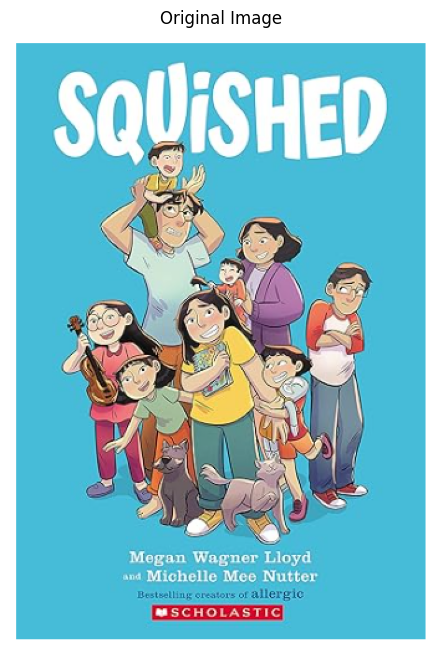

In [31]:
image = cv2.imread('/content/sample_data/Squished.png')  # Replace 'sample_image.jpg' with the path to your image
show_image(image, "Original Image")

## Question: What are the dimensions of the image?
Use the .shape property of the image.
Example: (Height, Width, Channels)


In [32]:
print("Image Type:", image.dtype)
print("Image Dimensions:", image.shape)


Image Type: uint8
Image Dimensions: (496, 340, 3)


# Step 3: Convert the Image to Grayscale



TASK: Convert the loaded image to grayscale using cv2.COLOR_BGR2GRAY

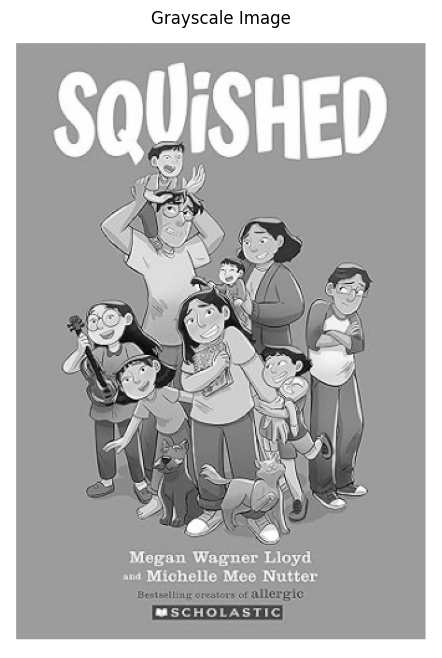

Image Type: uint8
Image Dimensions: (496, 340)


In [33]:
# grayscale_image = <FILL_THIS>
# show_image(grayscale_image, "Grayscale Image")

grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(grayscale_image, "Grayscale Image")
print("Image Type:", grayscale_image.dtype)
print("Image Dimensions:", grayscale_image.shape)

# Question: Why does the grayscale image only have one channel? Discuss.
A grayscale image has only one channel because each pixel represents a single value for light intensity (brightness), ranging from black to white. Unlike an RGB image that uses three channels for red, green, and blue to create color, a grayscale image uses one channel to convey all the tonal information.

*   Single value per pixel: The single channel holds a single number for each pixel, indicating its brightness level. For example, in an 8-bit grayscale image, this value ranges from 0 (black) to 255 (white).

*   No color information: Because there is only one channel, it's impossible to represent color. The image only contains shades of gray, and the value in this single channel determines where on the black-to-white spectrum the pixel falls.
*   Simpler data structure: This single-channel approach makes grayscale images simpler to process and store than color images, as there is less data to manage.

# Step 4: Represent the Image as a Matrix


## TASK: Display the grayscale image matrix using NumPy.

Use print() or plt.imshow() to observe pixel intensity values.


Matrix Size:  (496, 340)
Grayscale Image Matrix:
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


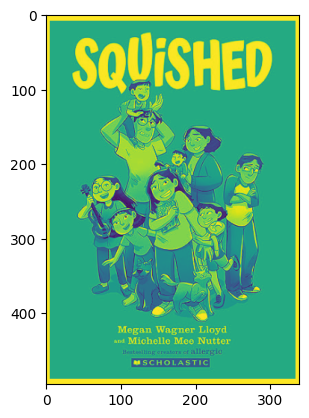

In [34]:
# print("Grayscale Image Matrix:")
# print(<FILL_THIS>)
grayscale_image_matrix = np.array(grayscale_image)
print("Matrix Size: ",grayscale_image_matrix.shape)
print("Grayscale Image Matrix:")
print(grayscale_image_matrix)
plt.imshow(grayscale_image_matrix)

## Optional TASK: Display the top-left 10x10 portion of the matrix.
Hint: Use array slicing ([:10, :10]).


The top-left 10x10 portion of the matrix:
Matrix Size:  (10, 10)
[[255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 156 156 156 156 156]]


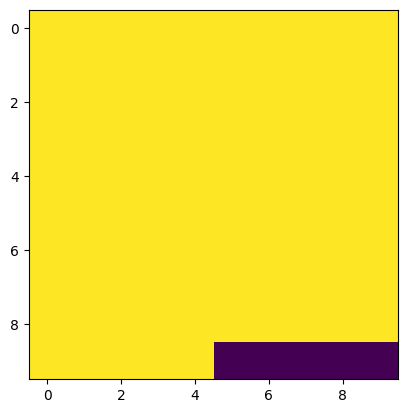

In [27]:
clipped_image_matrix = grayscale_image_matrix[:10,:10]
print("The top-left 10x10 portion of the matrix:")
print("Matrix Size: ",clipped_image_matrix.shape)
print(clipped_image_matrix)
plt.imshow(clipped_image_matrix)

# Step 5: Perform Image Manipulations

## TASK 1: Flip the Image Horizontally and Vertically

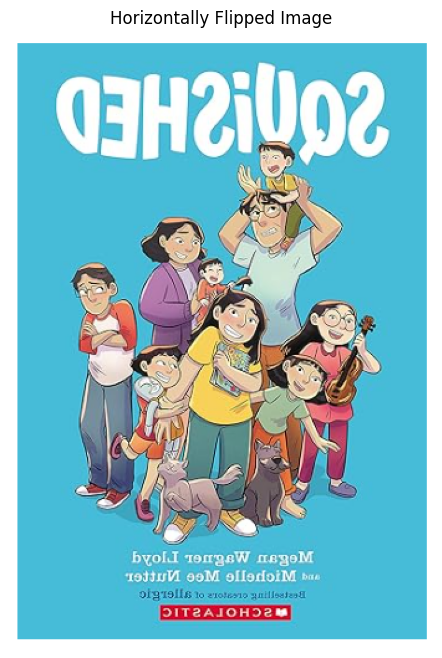

In [36]:
# horizontal_flip = <FILL_THIS>  # Hint: Use cv2.flip with code 1 for horizontal
# vertical_flip = <FILL_THIS>  # Hint: Use cv2.flip with code 0 for vertical

# show_image(horizontal_flip, "Horizontally Flipped Image")
# show_image(vertical_flip, "Vertically Flipped Image")

horizontal_flip = cv2.flip(image,1)
show_image(horizontal_flip, "Horizontally Flipped Image")

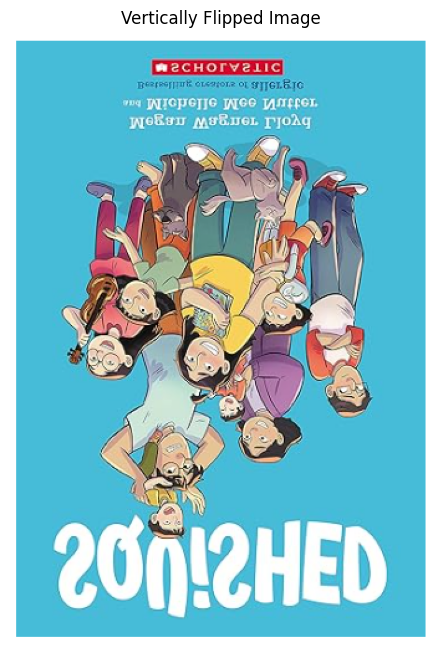

In [37]:
vertical_flip = cv2.flip(image,0)
show_image(vertical_flip, "Vertically Flipped Image")

## TASK 2: Crop the Image

Crop the grayscale image to the central 100x100 region.
HINT: Use array slicing and the .shape property to calculate the center.


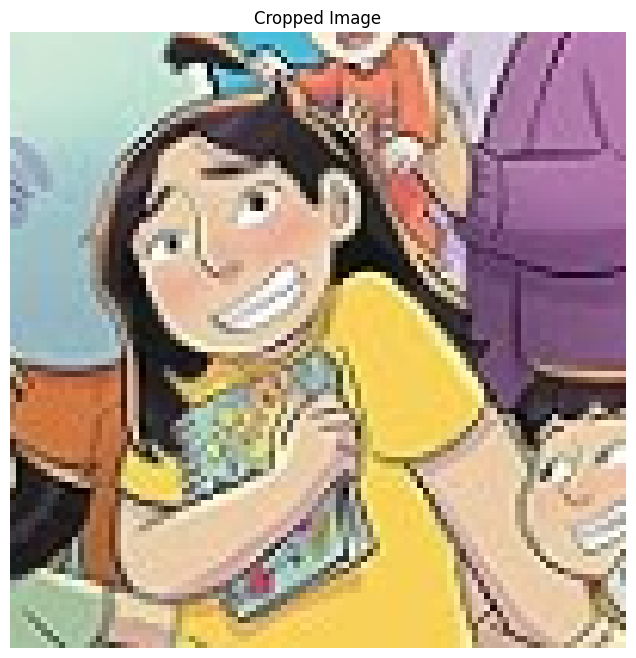

In [39]:
# center_crop = <FILL_THIS>
# show_image(center_crop, "Cropped Image")

def crop_center_100x100(image):
    height, width = image.shape[:2]
    start_x = width // 2 - 50
    start_y = height // 2 - 50
    return image[start_y:start_y+100, start_x:start_x+100]

center_crop = crop_center_100x100(image)
show_image(center_crop, "Cropped Image")

# Step 6: Explore Color Spaces

## TASK: Convert the original image to the HSV color space and display it.


BGR (Blue-Green-Red) and HSV (Hue-Saturation-Value) are two different color models used to represent colors digitally.


*   **BGR (Blue-Green-Red):**
    *   **Model**: An additive color model where colors are a combination of blue, green, and red light.
    *   **How it works**: Each channel (B, G, R) has a value (often 0-255) indicating the intensity of that color. A value of (255, 255, 255) is white, while (0, 0, 0) is black.
     *   **Common use**: It is the default color format for the popular computer vision library OpenCV.
*   **HSV (Hue-Saturation-Value)**
    *   **Model**: A cylindrical color model that is often more useful for image processing and human perception.
    *   **How it works**: It separates color into
        *   Hue: Represents the "color" itself (e.g., red, green, blue) and is often represented as an angle on a color wheel (0-360 degrees).
        *   Saturation: Indicates the purity or intensity of the color, with (0%) being a shade of gray and (100%) being a pure color.
        *   Value: Represents the brightness of the color, with a value of (0%) being black and (100%) being the brightest possible version of the hue.
    *   **Common use**: Ideal for tasks like object detection, color filtering, and object tracking because it decouples color from brightness, making it more robust to lighting changes.


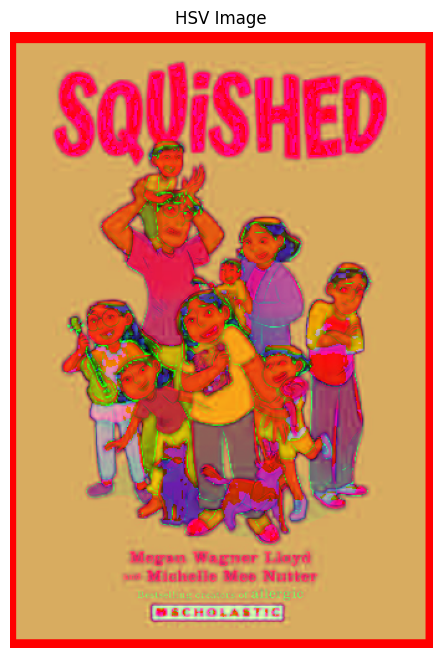

In [40]:
# hsv_image = cv2.cvtColor(image, <FILL_THIS>)
# show_image(hsv_image, "HSV Image")

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
show_image(hsv_image, "HSV Image")

## Optional TASK: Split the HSV image into its three channels (Hue, Saturation, Value).
Display each channel separately.
Hint: Use cv2.split()


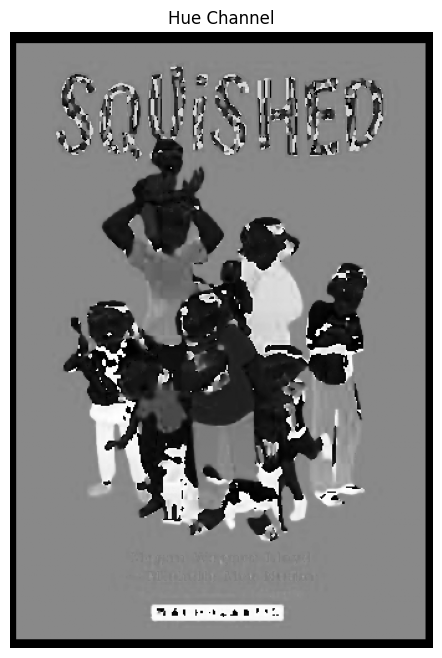

In [42]:
h, s, v = cv2.split(hsv_image)
show_image(h, "Hue Channel")

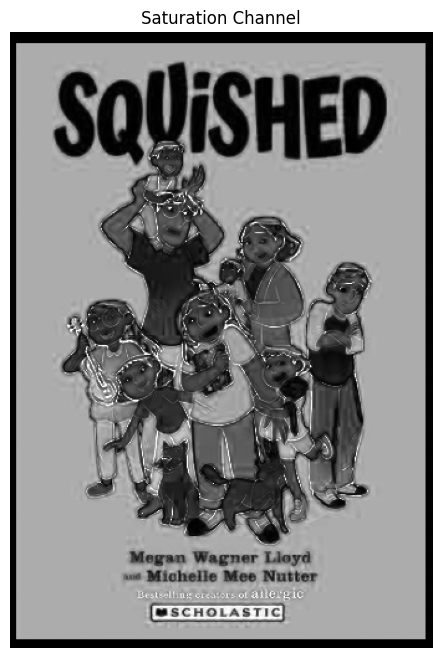

In [43]:
show_image(s, "Saturation Channel")

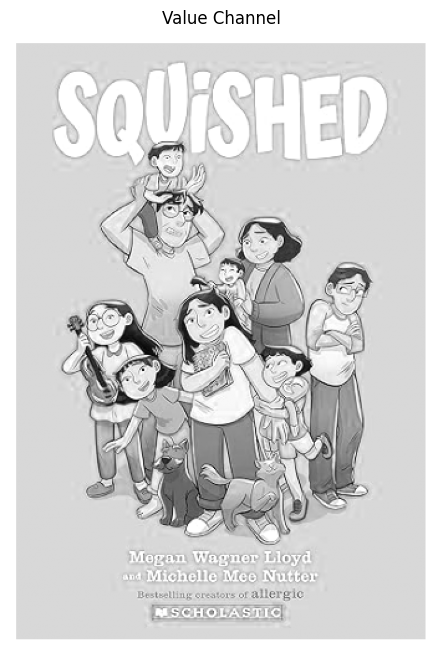

In [44]:
show_image(v, "Value Channel")


### **Instructions for Students**
1. Complete the `FILL_THIS` placeholders.
2. Try out different images and observe the outputs.
3. Answer the questions in the comments for deeper understanding.
